<a href="https://colab.research.google.com/github/KirstenC32/KirstenC32/blob/main/Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Kirsten Casteel

## Project Overview

##Load and Inspect Data

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fpath = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?


There are 8523 rows and 12 columns


In [59]:
#1) How many rows and columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
#obtain shape to get row,column values
df_sales.shape

(8523, 12)

##Clean Data

2) What are the datatypes of each variable?


In [61]:
#Obtain data types
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.


In [62]:
#check for duplicates
duplicated_rows = df_sales.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [63]:
#count duplicates
df_sales.duplicated().sum()

0

4) Identify missing values.



In [64]:
#Identify columns with null values
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [65]:
#check data types for columns
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [66]:
#count null values and find percent
null_sums = df_sales.isna().sum() / len(df_sales) * 100
null_sums

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [67]:
#Value count for item weight
df_sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [68]:
#value count for outlet size
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

5) Address the missing values by using a placeholder value.


In [69]:
#fill null values in Item weight with -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)
df_sales['Item_Weight'].isna().sum()

0

In [70]:
#check work
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
import numpy as np

In [72]:
#fill null values in outlet_size with 'missing'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna("MISSING")
#check work
df_sales['Outlet_Size'].isna().sum()

0

6) Confirm that there are no missing values after addressing them.


In [73]:
check_null_sums = df_sales.isna().sum() / len(df_sales) * 100
check_null_sums

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [74]:
#Create a list for object columns
string_cols = df_sales.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [75]:
#Loop through columns to check for inconsistenties
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increase readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [76]:
#I noticed errors in 'Item Fat Content'
#I will replace LF and low fat with Low Fat, and reg to Regular
df_sales["Item_Fat_Content"] = df_sales['Item_Fat_Content'].replace({"reg" : "Regular", "LF" : "Low Fat", "low fat" : "Low Fat"})
#Confirm changes
df_sales["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

***I notice some issues with Item Weight, but unnsure if it is best to fill with -1, mean of column, drop column etc...so I have replaced with -1 for now***

In [77]:
#create a list for number columns
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [78]:
#Use .describe to obtain summary statistics of number columns
df_sales.describe(include = "number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [79]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Exploratory Data Analysis

###Part 3 (Core):

We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

  -Histograms to view the distributions of numerical features in your dataset.

  -Boxplots to view statistical summaries of numerical features in your dataset.

  -Countplots to view the frequency of each class of categorial features in your dataset.

  -Heatmap to view the correlation between features.

###Start updating the README file associated with the project.

  -Add text describing the project.

  -Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.
  
Please feel free to add more than the minimum. Remember, this is your chance to display your skills!​

Commit your work to GitHub.

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

###Histograms to view the distributions of numerical features in dataset.

In [80]:
#View number columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

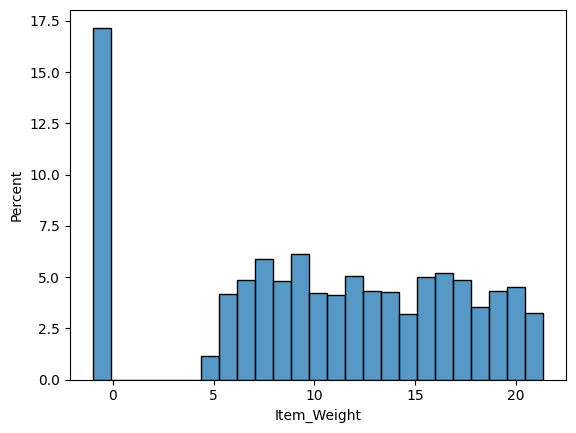

In [81]:
#Visualize Item weight
ax = sns.histplot(data=df_sales, x="Item_Weight", stat='percent');

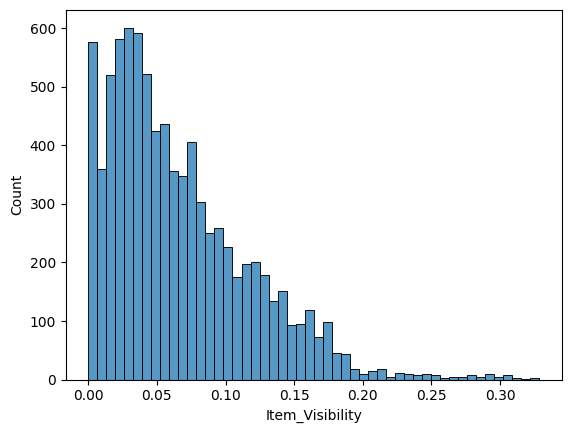

In [82]:
#Visualize Item visibility
ax = sns.histplot(data=df_sales, x="Item_Visibility");

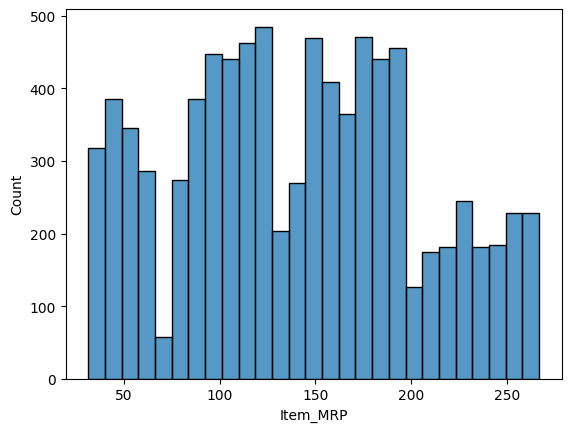

In [83]:
# Visualize Item_MRP
ax = sns.histplot(data=df_sales, x="Item_MRP");

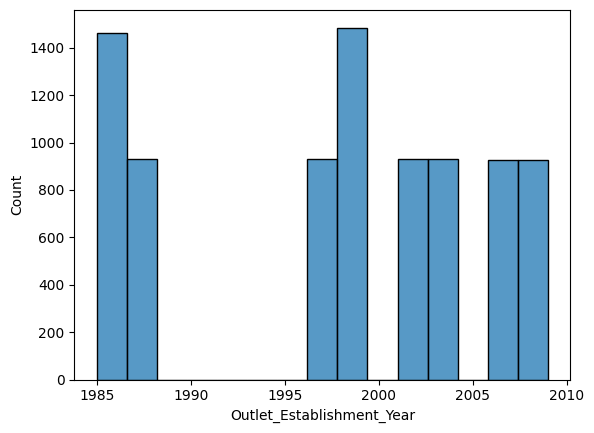

In [84]:
#Visualize Outlet_Establishment_Year
ax = sns.histplot(data=df_sales, x="Outlet_Establishment_Year");

In [85]:
# Visualize Item_Outlet_Sales

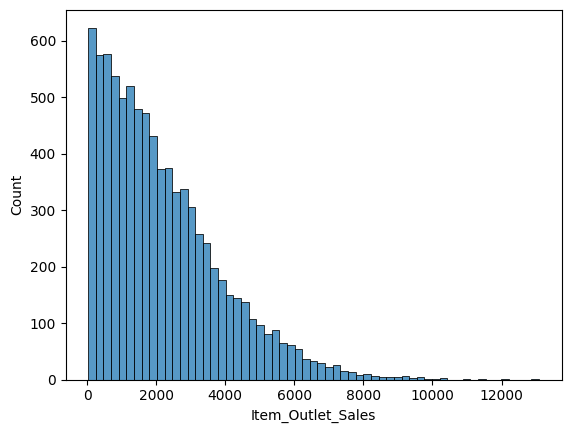

In [86]:
ax = sns.histplot(data=df_sales, x="Item_Outlet_Sales");

###Boxplots to view statistical summaries of numerical features in dataset.

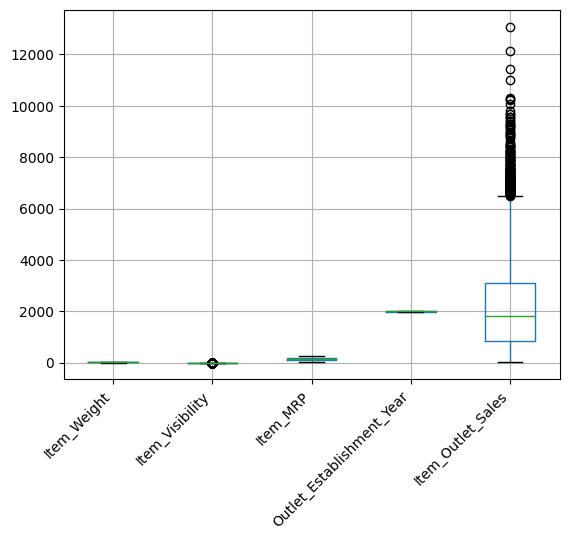

In [87]:
#Box plot for all numerical columns
ax = df_sales.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

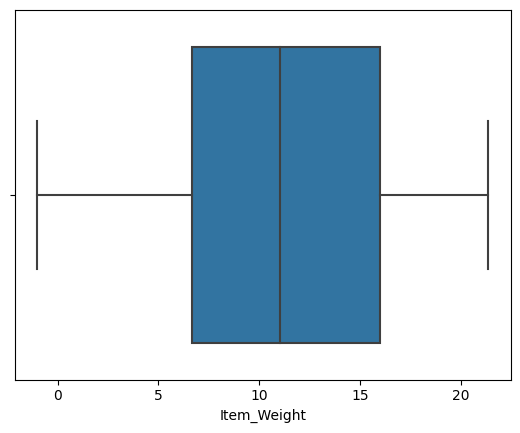

In [88]:
#Boxplot for Item Weight
ax = sns.boxplot(data=df_sales, x="Item_Weight")

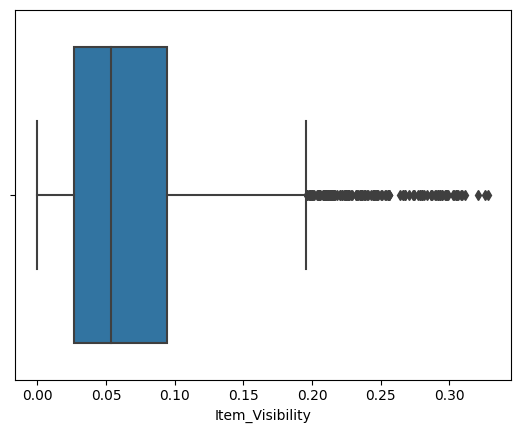

In [89]:
#Boxplot for Item Visibility
ax = sns.boxplot(data=df_sales, x="Item_Visibility")

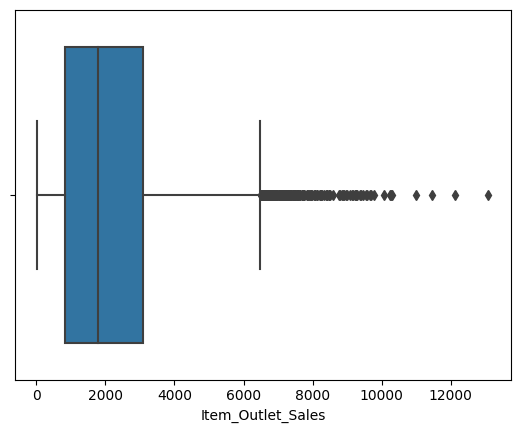

In [90]:
#Boxplot for Sales
ax = sns.boxplot(data=df_sales, x="Item_Outlet_Sales")

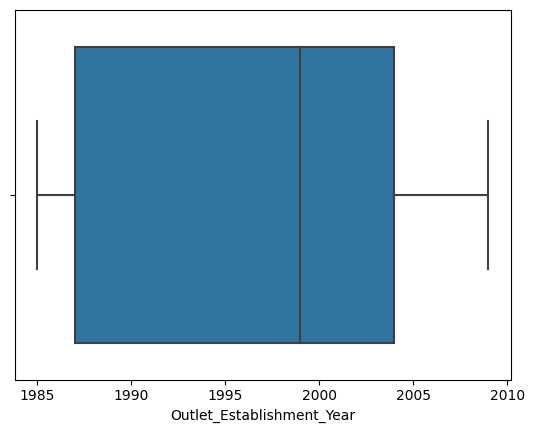

In [91]:
#Boxplot for Establishment year
ax = sns.boxplot(data=df_sales, x="Outlet_Establishment_Year")

###Countplots to view the frequency of each class of categorial features in dataset.

In [92]:
#View cat_cols
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [93]:
df_sales[string_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [94]:
#Value Counts for Item_Fat_Content
val_counts_fat = df_sales['Item_Fat_Content'].value_counts()
val_counts_fat

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

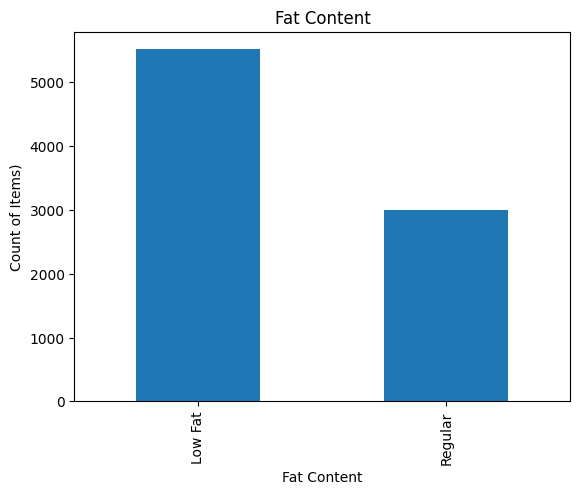

In [95]:
# Plot value counts as a bar graph
ax = val_counts_fat.plot(kind='bar')
ax.set_ylabel("Count of Items)");
ax.set_xlabel("Fat Content");
ax.set_title('Fat Content');


In [96]:
#Item_Type value count
val_counts_type = df_sales['Item_Type'].value_counts()
val_counts_type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

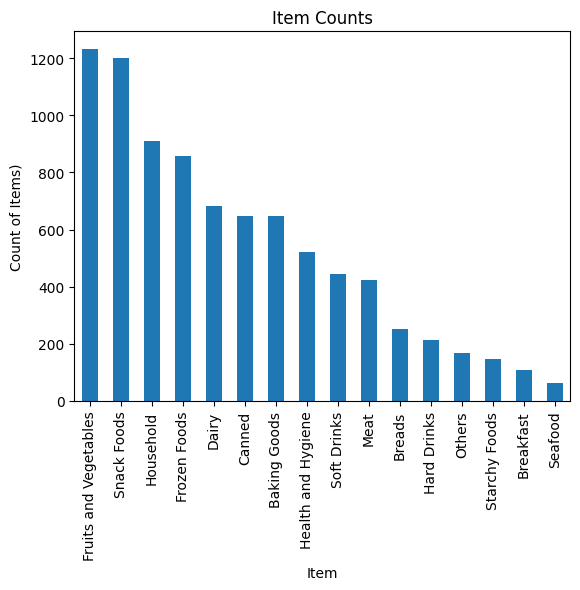

In [97]:
# Plot value counts as a bar graph
ax = val_counts_type.plot(kind='bar')
ax.set_ylabel("Count of Items)");
ax.set_xlabel("Item");
ax.set_title('Item Counts');

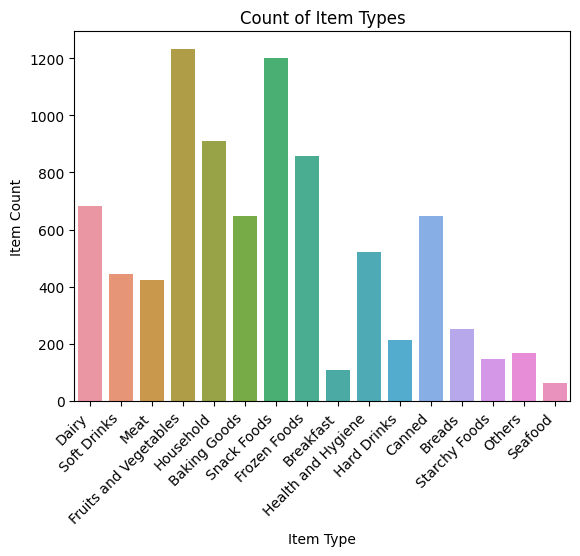

In [98]:
#Use seaborn
ax = sns.countplot(data=df_sales, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Count of Item Types');
ax.set_xlabel('Item Type');
ax.set_ylabel('Item Count');

<ipython-input-99-37e6307624e3>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


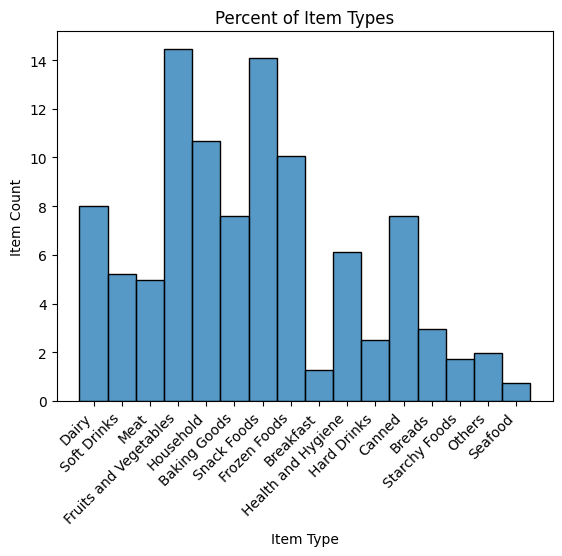

In [99]:
#Percent of data per item
ax = sns.histplot(data=df_sales, x='Item_Type', stat='percent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Percent of Item Types');
ax.set_xlabel('Item Type');
ax.set_ylabel('Item Count');

###Heatmap to view the correlation between features

In [100]:
#Get correlation
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


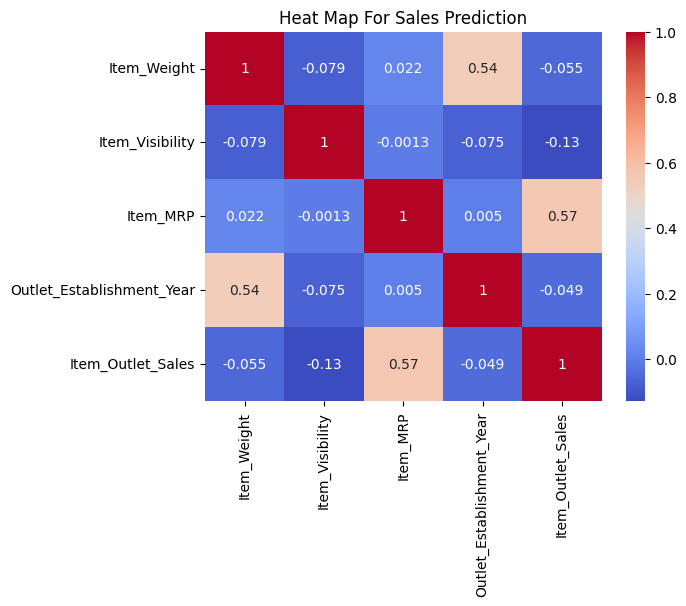

In [101]:
# Make heatmap of correlations
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);
ax.set_title('Heat Map For Sales Prediction');

#Feature Inspection

Replace place holders with Nan

In [102]:
# Replace -1 with null Nan for Item Weight
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)
# Check value counts
df_sales['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [103]:
# Replace MISSING with null Nan for outlet size
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('MISSING', np.nan)
# Check value counts
df_sales['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [104]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



##Item_Identifier

- Product ID

###Create a univariate visualization showing the distribution of values/categories.
You may use the EDA functions from the previous lessons or create your own visualizations.

In [187]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df_sales[feature].dtype

dtype('O')

In [133]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{https://colab.research.google.com/drive/1zY5aMjFSjszocmjZUdlBJTFrgnEqUOHK#scrollTo=Zg19NDsjrAG4}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


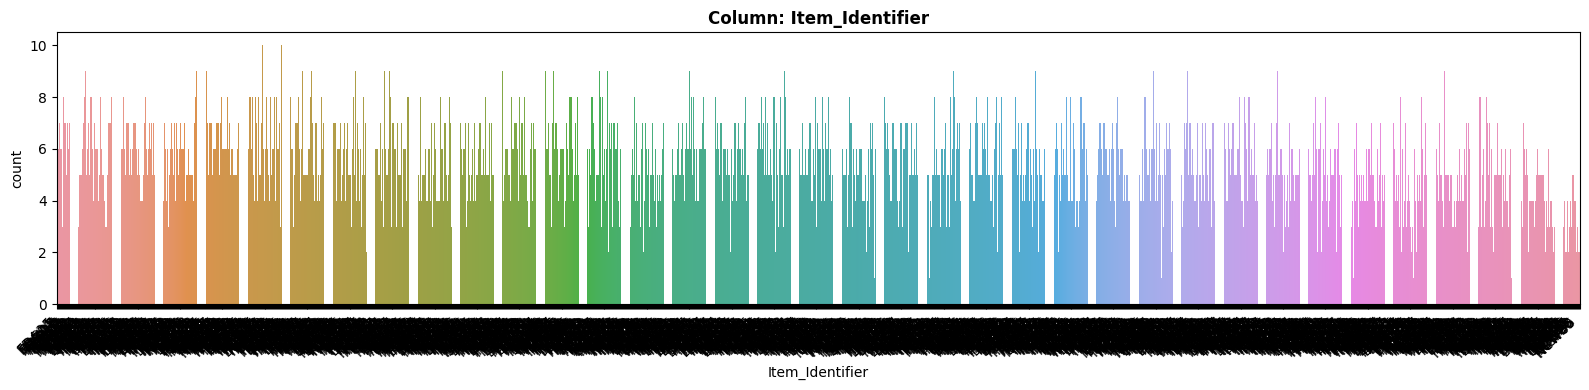

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [188]:
explore_categorical(df_sales, feature, figsize = (16, 4));

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, it is high, there are many more than 10
- Would we know this BEFORE the target is determined?
    - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - The feature could be important for identifying items(index), but not directly important for predicting future sales, should not be used for modeling.

###Create a multivariate visualization plotting each feature vs. the target.

In [186]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{https://colab.research.google.com/drive/1zY5aMjFSjszocmjZUdlBJTFrgnEqUOHK#scrollTo=Zg19NDsjrAG4}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

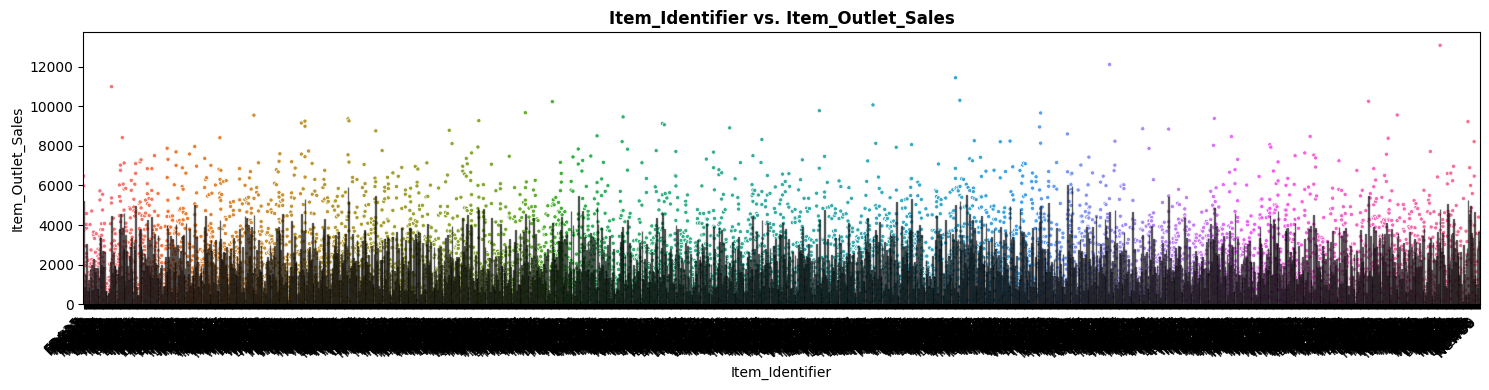

In [191]:
plot_categorical_vs_target(df_sales, feature, y="Item_Outlet_Sales", figsize=(15, 4));

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No


##Item_Weight
- Weight of product

###Create a univariate visualization showing the distribution of values/categories.

In [192]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_sales[feature].dtype

dtype('float64')

In [193]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{https://colab.research.google.com/drive/1zY5aMjFSjszocmjZUdlBJTFrgnEqUOHK#scrollTo=Zg19NDsjrAG4}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

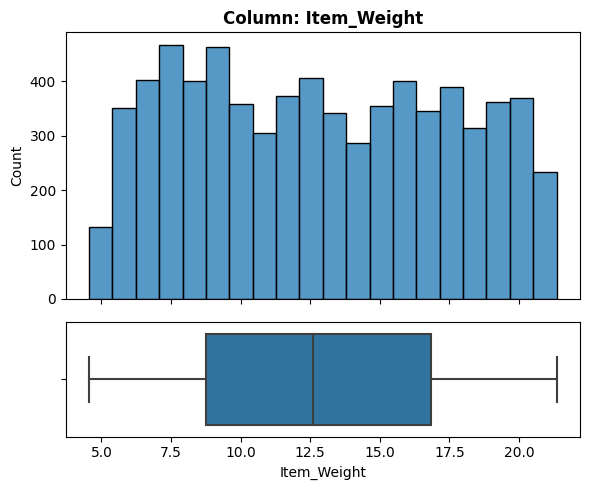

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [194]:
explore_numeric(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463(17.17%)
  - I think drop column, I don't think this will have any indication for sales
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, 415 unique values
  - This feature may be problematic for modeling due to high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - Weight can be varied depending on item with no correlation to sales and there are alot of missing values

###Create a multivariate visualization plotting each feature vs. the target.

In [196]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

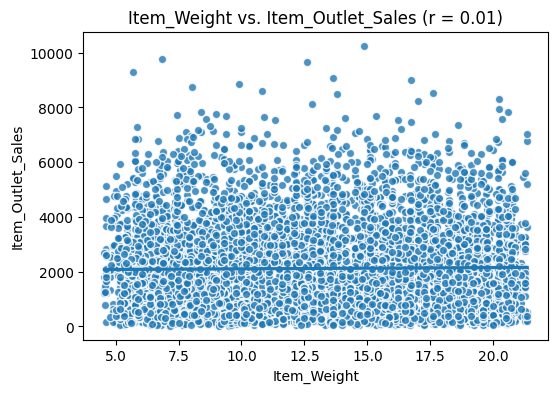

In [197]:
plot_numeric_vs_target(df_sales, feature, y="Item_Outlet_Sales");

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I wouldnt expect weight to be an indicator of sales.
- Does this feature appear to be a predictor of the target?
  - No

##Item_Fat_Content
- Whether the product is low-fat or regular

###Create a univariate visualization showing the distribution of values/categories.

In [198]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_sales[feature].dtype

dtype('O')

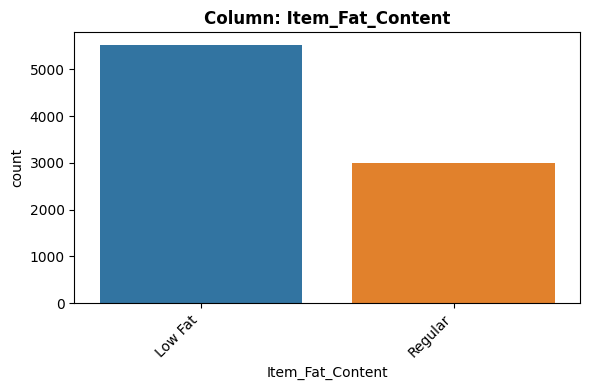

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [199]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - No, only 2 unique values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, fat content could have an affect on sales

###Create a multivariate visualization plotting each feature vs. the target.

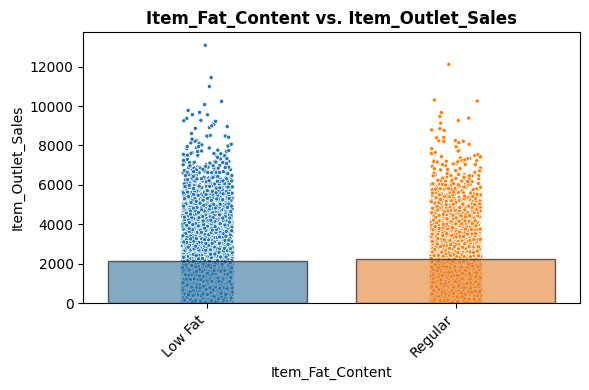

In [135]:
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales');

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Maybe slightly, less than I thought it would

##Item_Visibility

- The percentage of total display area of all products in a store allocated to the particular product

###Create a univariate visualization showing the distribution of values/categories.

In [202]:
feature = "Item_Visibility"
df_sales[feature].dtype

dtype('float64')

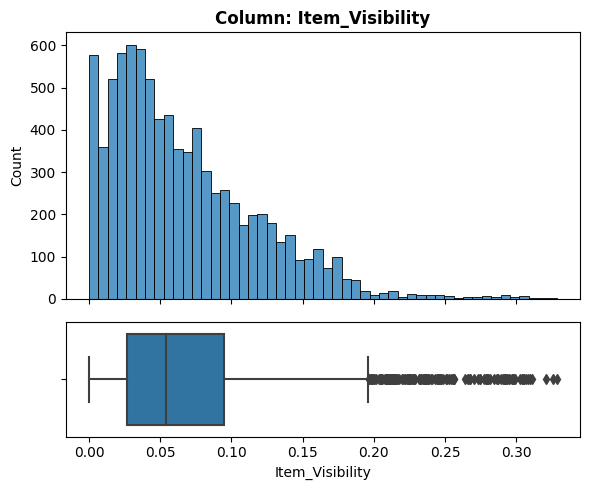

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [203]:
explore_numeric(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, 7880 unique values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, the closer to 0, the higher the count so the visibility and sales have a correlation

###Create a multivariate visualization plotting each feature vs. the target.

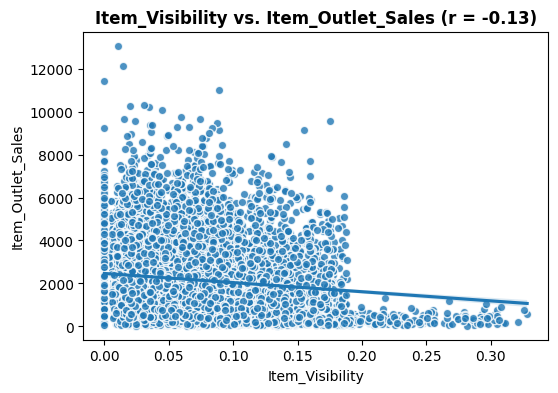

In [207]:
plot_numeric_vs_target(df_sales, feature, y = 'Item_Outlet_Sales');

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, closer to 0, higher the sales

##Item_Type
- The category to which the product belongs

###Create a univariate visualization showing the distribution of values/categories

In [208]:
feature = 'Item_Type'
df_sales[feature].dtype

dtype('O')

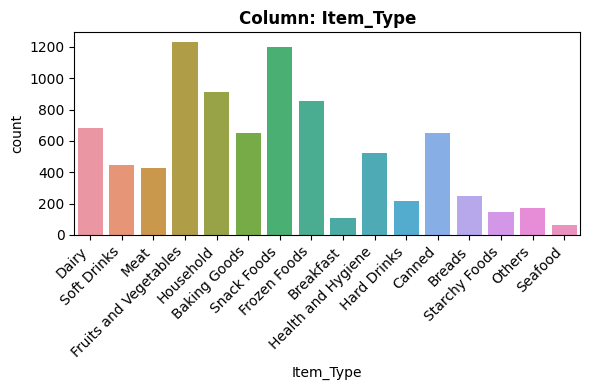

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [209]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, 16
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, Item type could be an indicator of sales

###Create a multivariate visualization plotting each feature vs. the target.

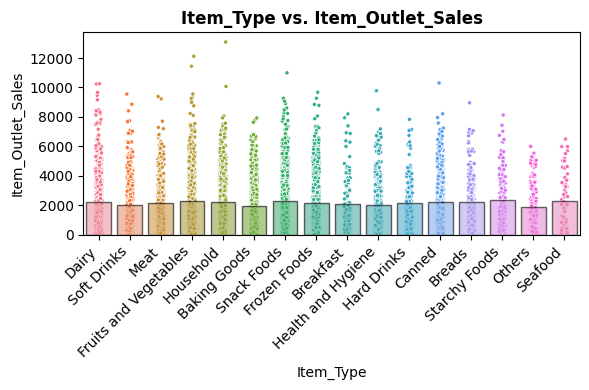

In [210]:
plot_categorical_vs_target(df_sales, feature, y="Item_Outlet_Sales");

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Only slightly from this visualization. It seems some item types produce more sales than others

##Item_MRP
- Maximum Retail Price (list price) of the product

###Create a univariate visualization showing the distribution of values/categories

In [146]:
feature = 'Item_MRP'
df_sales[feature].dtype

dtype('float64')

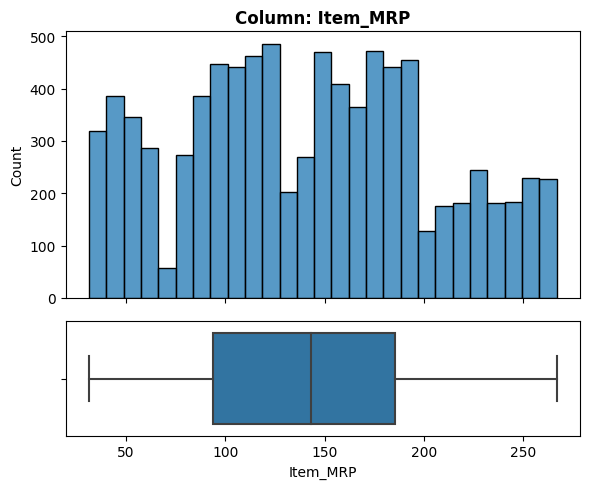

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [148]:
explore_numeric(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, 5938 unique values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, MRP could have a correlation to sales

###Create a multivariate visualization plotting each feature vs. the target.

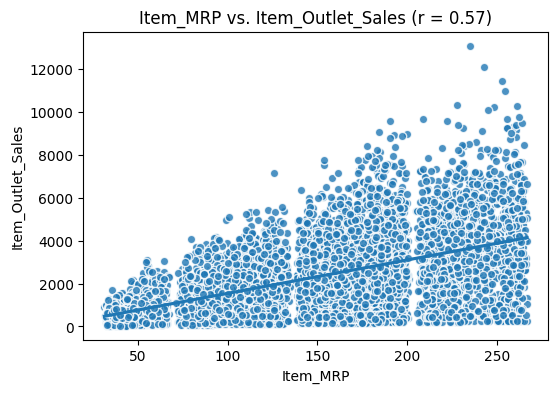

In [150]:
plot_numeric_vs_target(df_sales, feature, y='Item_Outlet_Sales');

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, higher MRP seems to have a correlation with higher sales.

##Outlet_Identifier
- Store ID

###Create a univariate visualization showing the distribution of values/categories

In [211]:
feature = 'Outlet_Identifier'
df_sales[feature].dtypes

dtype('O')

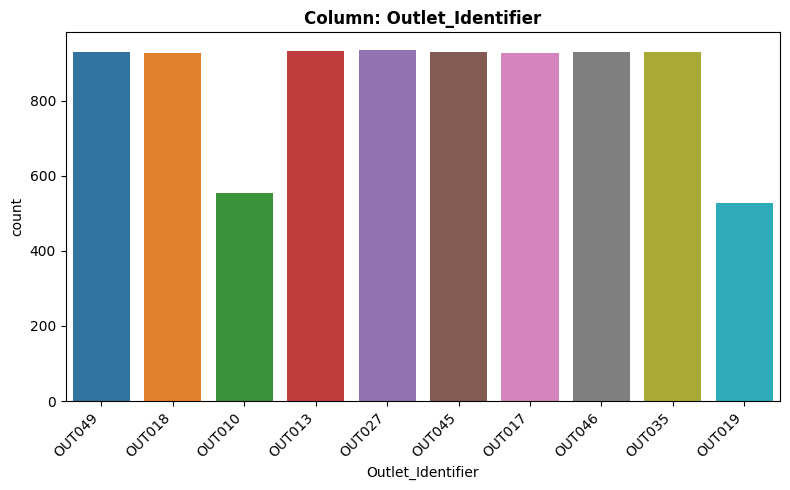

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [214]:
explore_categorical(df_sales, feature, figsize=(8, 5));

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - Yes, 10 exactly
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, some outlets seem to have lower or higher sales

###Create a multivariate visualization plotting each feature vs. the target.

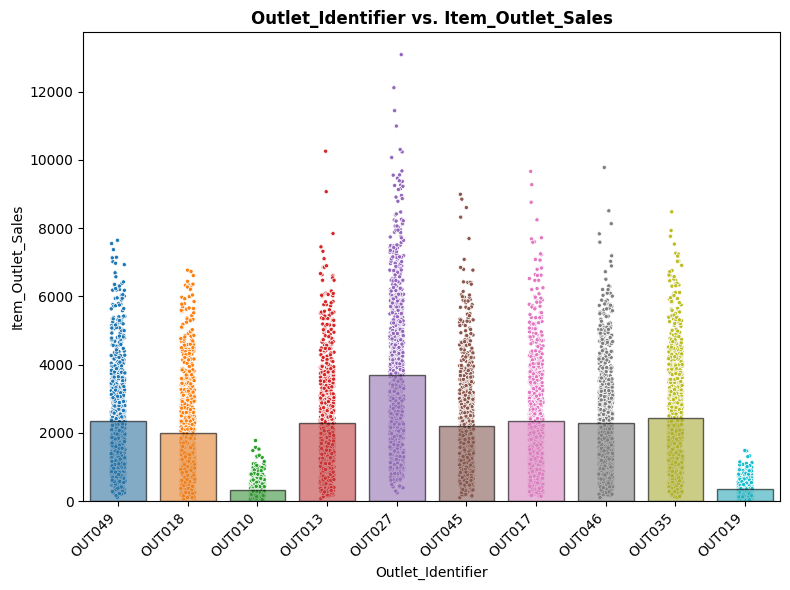

In [215]:
plot_categorical_vs_target(df_sales, feature, y="Item_Outlet_Sales", figsize = (8,6));

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, also some outliers that might skew the data a bit but I would expect some locations to have higher sales than others

##Outlet_Establishment_Year
- The year in which store was established

###Create a univariate visualization showing the distribution of values/categories

In [216]:
feature = "Outlet_Establishment_Year"
df_sales[feature].dtypes

dtype('int64')

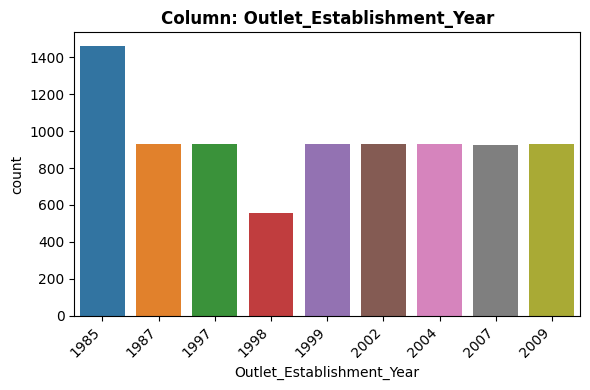

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [217]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no
- What is the cardinality? Is it high?
  - No, 9
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - Maybe, could be a predicter of sales

###Create a multivariate visualization plotting each feature vs. the target.

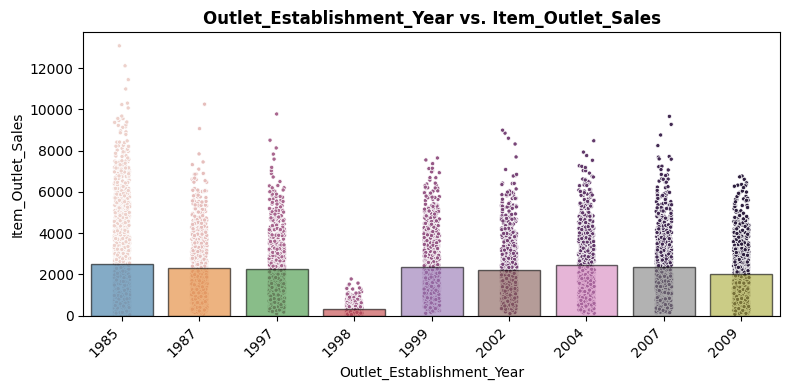

In [220]:
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales', figsize=(8,4));

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No, there seems to be outliers skewing the data, the age of the store doesnt seem to be a factor in sales, but the specific store or location does.   

##Outlet_Size
- The size of the store in terms of ground area covered

###Create a univariate visualization showing the distribution of values/categories


In [222]:
feature = 'Outlet_Size'
df_sales[feature].dtypes

dtype('O')

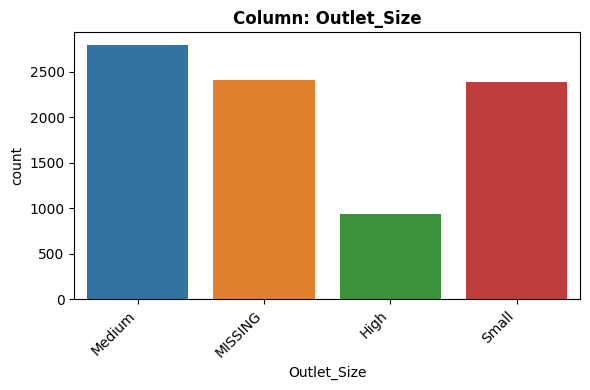

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [223]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 nulls, 28.28%
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - No, 4 values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - Possibly due to missing values

###Create a multivariate visualization plotting each feature vs. the target.

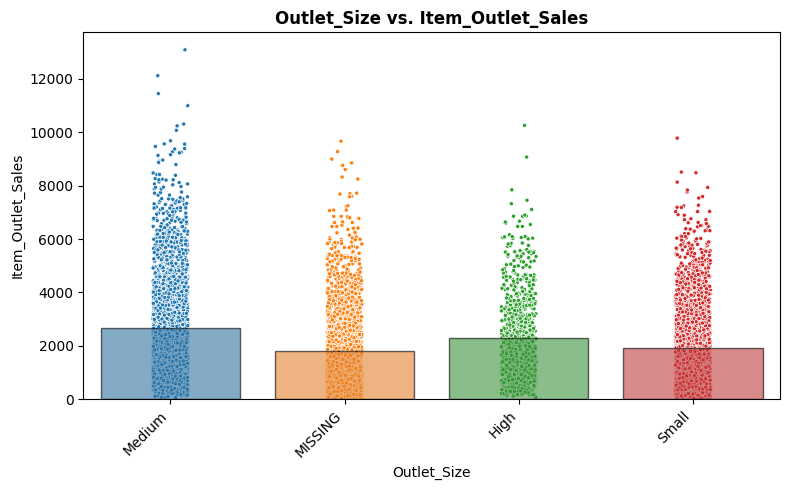

In [224]:
plot_categorical_vs_target(df_sales, feature, y="Item_Outlet_Sales", figsize = (8,5));

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Maybe a little bit but it looks like that may be due to some outliers and there are alot of missing values.

##Outlet_Location_Type
- The type of area in which the store is located

###Create a univariate visualization showing the distribution of values/categories

In [165]:
feature = "Outlet_Location_Type"
df_sales[feature].dtypes

dtype('O')

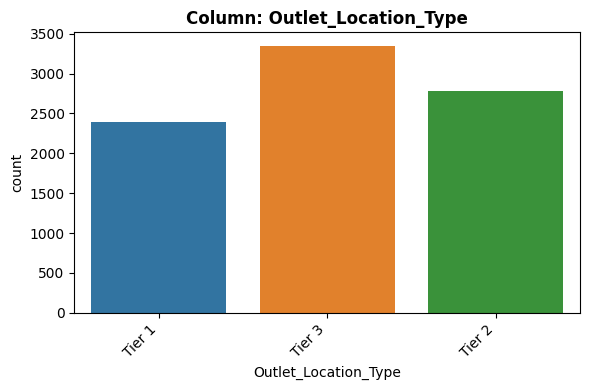

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [166]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - No, 3 values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, area seems to be a predicter of sales

###Create a multivariate visualization plotting each feature vs. the target.

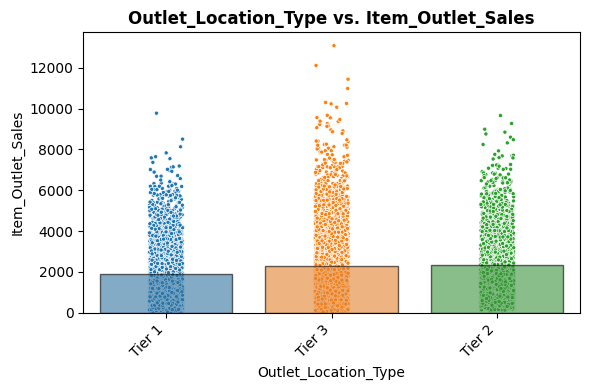

In [167]:
plot_categorical_vs_target(df_sales, feature, y="Item_Outlet_Sales");

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes a little bit, maybe due to some outlier products that certian tiers carry

##Outlet_Type
- Whether the outlet is a grocery store or some sort of supermarket

###Create a univariate visualization

In [168]:
feature = "Outlet_Type"
df_sales[feature].dtypes

dtype('O')

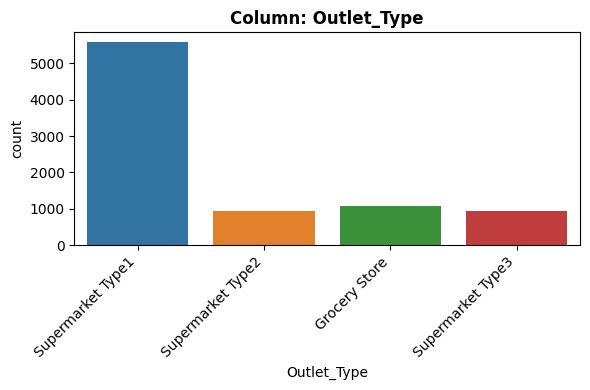

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [169]:
explore_categorical(df_sales, feature);

###Feature Observations
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null values
- Is the feature constant or quasi-constant?
  - no, not constant or quasi-constant
- What is the cardinality? Is it high?
  - No, low. 4 unique values
- Would we know this BEFORE the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No, could have influence on sales

###Create a multivariate visualization plotting each feature vs. the target.

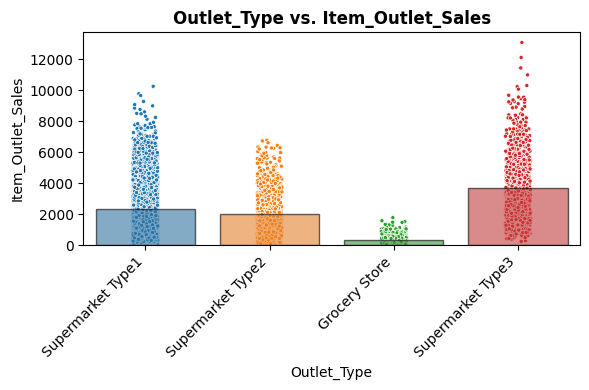

In [170]:
plot_categorical_vs_target(df_sales, feature, y = 'Item_Outlet_Sales');

###Answer the following questions from the Feature Inspection lesson in a Markdown cell:
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, different types of stores can carry different/more expensive products
- Does this feature appear to be a predictor of the target?
  - Yes

##Item_Outlet_Sales
- Sales of the product in the particular store. This is the target variable to be predicted.